In [ ]:
#metodo de minimos ponderados 
#w=1/(err dato)**2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
datos = np.genfromtxt("ej-ajuste-04.txt")
x = datos[:,0]
y = datos[:,1]
dy= datos[:,2]
w = 1/(dy)**2

In [16]:
np.polyfit(x,y,1)#se pueden  usar tambien para minimos cuadradros

array([0.32857143, 2.53333333])

In [17]:
np.polyfit(x,y,1,w=1/dy)#ahora da llos valores ponderados 

array([0.45713123, 2.34204248])

In [18]:
a1,a0 = np.polyfit(x,y,1,w=1/dy)

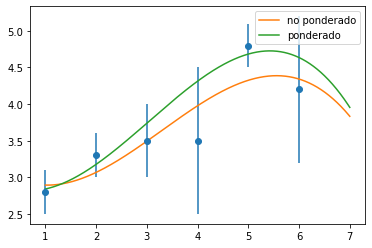

In [7]:
a = np.polyfit(x,y,3)
b = np.polyfit(x,y,3,w=1/dy)
plt.errorbar(x,y,yerr=dy,fmt="o")
xx = np.linspace(1,7,1000) 
plt.plot(xx,np.polyval(a,xx),label="no ponderado")
plt.plot(xx,np.polyval(b,xx),label="ponderado")
plt.legend()


In [ ]:
from scipy.stats import linregress#para regresiones lineales de polinomios

In [38]:
from scipy.optimize import curve_fit#sirve para cualquier funcion
def f(x,a,b):
    return a+b*np.log(x)


In [39]:
curve_fit(f,x,y,sigma=dy)[0]

array([2.65739898, 1.15471855])

In [9]:
def respon(a,x,y,dy):
    #residuos ponderados 
    return (y-a[0]-a[1]*x)/dy


In [11]:
from scipy.optimize import leastsq
a_in = [1,1]
leastsq(respon,a_in,args=(x,y,dy))[0]

array([2.34204247, 0.45713123])